In [63]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

In [64]:
df = pd.read_csv("Auto.csv")
df['origin'] = df['origin'].astype('category')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.dtypes)
df.head(5)

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [65]:
def linearRegression(df, model_formula, seed=1, print_mse=False):
    np.random.seed(seed)
    mask = np.random.rand(len(df)) < 0.8
    train_set = df[mask]
    test_set = df[~mask]

    train_y, train_x = dmatrices(model_formula, data=train_set, return_type="dataframe")
    valid_y, valid_x = dmatrices(model_formula, data=test_set, return_type="dataframe")

    model = sm.OLS(train_y, train_x)
    result = model.fit()

    train_y_pred = result.predict(train_x)
    valid_y_pred = result.predict(valid_x)
    train_mse = metrics.mean_squared_error(train_y, train_y_pred)
    valid_mse = metrics.mean_squared_error(valid_y, valid_y_pred)
    
    if print_mse == True:
        print(f"MSE_Train: {train_mse}")
        print(f"MSE_Test: {valid_mse}\n")

    return result, {"train": train_mse, "valid": valid_mse}

In [66]:
result,_ = linearRegression(df, "mpg ~ horsepower", True)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     465.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.11e-63
Time:                        17:07:47   Log-Likelihood:                -932.73
No. Observations:                 308   AIC:                             1869.
Df Residuals:                     306   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5555      0.821     49.392      0.000      38.940      42.171
horsepower    -0.1602      0.007    -21.574      0.000      -0.175      -0.146
==============================================================================
Omnibus:                       11.228   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.400
Skew:                           0.449   Prob(JB):                      0.00335
Kurtosis:                       3.284   Cond. No.                         318.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                   mpg  cylinders  displacement  horsepower    weight  acceleration      year
mpg           1.000000  -0.776260     -0.804443   -0.778427 -0.831739      0.422297  0.581469
cylinders    -0.776260   1.000000      0.950920    0.842983  0.897017     -0.504061 -0.346717
displacement -0.804443   0.950920      1.000000    0.897257  0.933104     -0.544162 -0.369804
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538     -0.689196 -0.416361
weight       -0.831739   0.897017      0.933104    0.864538  1.000000     -0.419502 -0.307900
acceleration  0.422297  -0.504061     -0.544162   -0.689196 -0.419502      1.000000  0.282901
year          0.581469  -0.346717     -0.369804   -0.416361 -0.307900      0.282901  1.000000


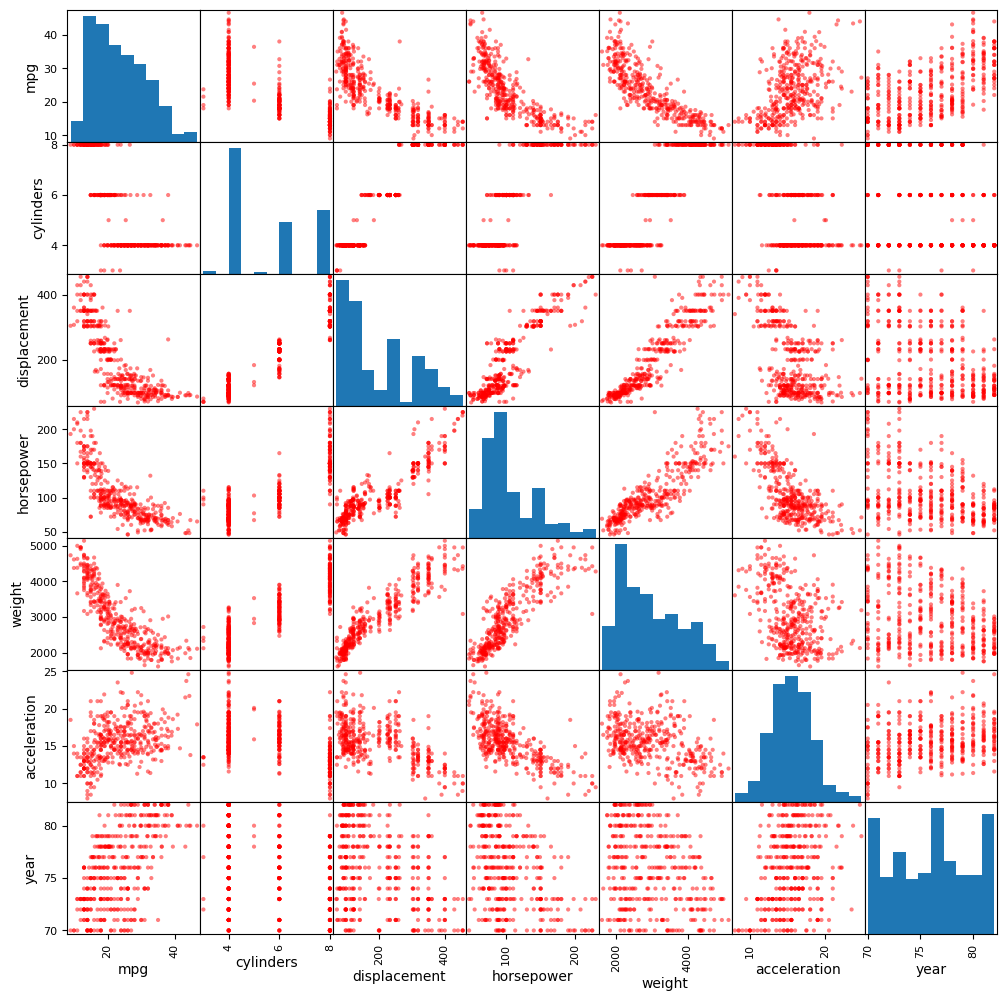

In [67]:
pd.set_option('display.width', 1000)
print(df.corr())
axis = pd.plotting.scatter_matrix(df,color="red",figsize=(12,12))

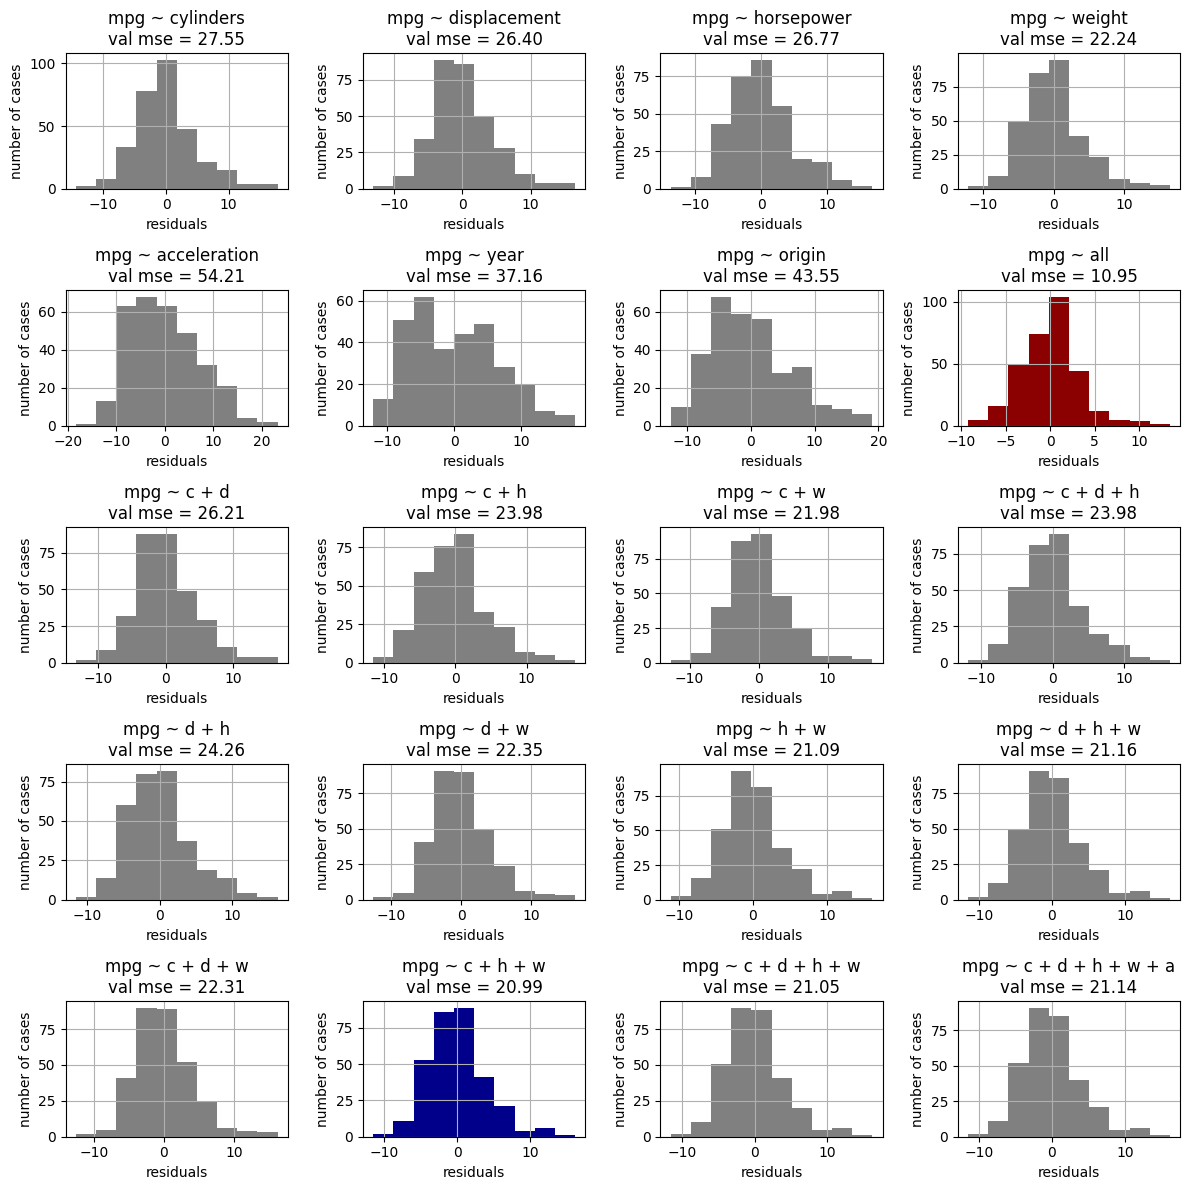

In [68]:
models = [
    "mpg ~ cylinders",
    "mpg ~ displacement",
    "mpg ~ horsepower",
    "mpg ~ weight",
    "mpg ~ acceleration",
    "mpg ~ year",
    "mpg ~ origin",
    
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
    
    "mpg ~ cylinders + displacement",
    "mpg ~ cylinders + horsepower ",
    "mpg ~ cylinders + weight",
    "mpg ~ cylinders + displacement + horsepower",
    
    "mpg ~ displacement + horsepower",
    "mpg ~ displacement + weight",
    "mpg ~ horsepower + weight",
    "mpg ~ displacement + horsepower + weight",
    
    "mpg ~ cylinders + displacement + weight",
    "mpg ~ cylinders + horsepower + weight",
    "mpg ~ cylinders + displacement + horsepower + weight",
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration"
]

model_name = [model for model in models]
model_name[7] = "mpg ~ all"
model_name[8] = "mpg ~ c + d"
model_name[9] = "mpg ~ c + h"
model_name[10] = "mpg ~ c + w"
model_name[11] = "mpg ~ c + d + h"
model_name[12] = "mpg ~ d + h"
model_name[13] = "mpg ~ d + w"
model_name[14] = "mpg ~ h + w"
model_name[15] = "mpg ~ d + h + w"
model_name[16] = "mpg ~ c + d + w"
model_name[17] = "mpg ~ c + h + w"
model_name[18] = "mpg ~ c + d + h + w"
model_name[19] = "mpg ~ c + d + h + w + a"

seed = np.random.randint(2**32)

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(5, 4, i)
    result, mse = linearRegression(df, model, seed)
    color = "gray" if mse["valid"] > 21 else "darkblue"
    ax = result.resid.hist(color=color if mse["valid"] > 15 else "darkred")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{model_name[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

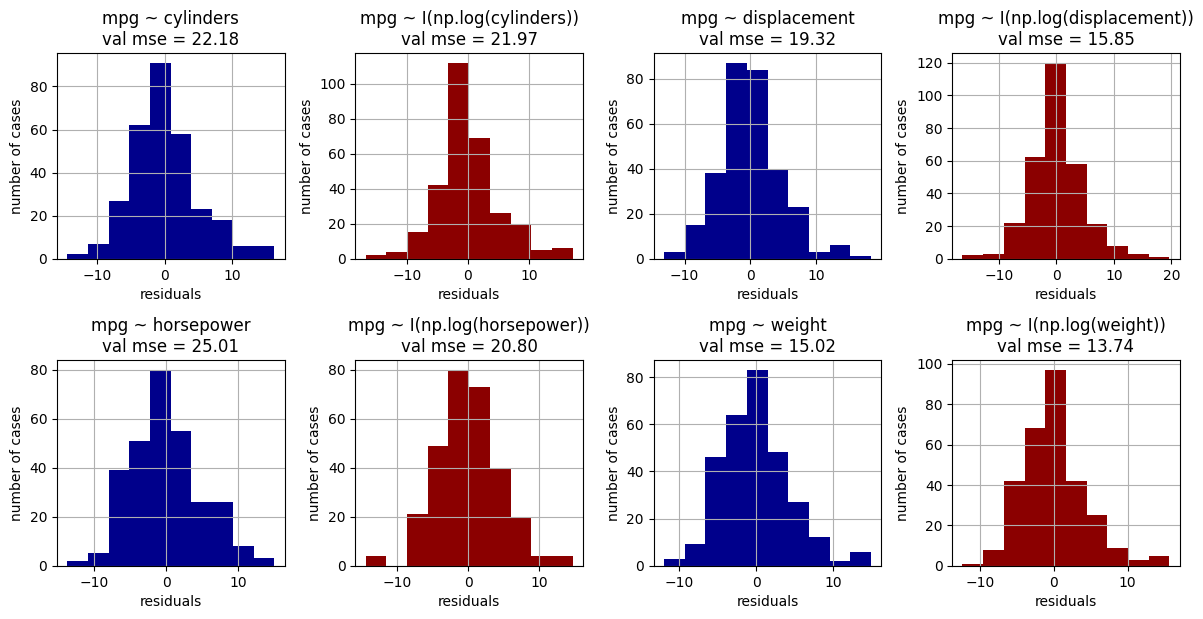

In [77]:
models = [
    "mpg ~ cylinders",
    "mpg ~ I(np.log(cylinders))",
    "mpg ~ displacement",
    "mpg ~ I(np.log(displacement))",
    "mpg ~ horsepower",
    "mpg ~ I(np.log(horsepower))",
    "mpg ~ weight",
    "mpg ~ I(np.log(weight))",
]

seed = np.random.randint(2**32)

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(4, 4, i)
    result, mse = linearRegression(df, model, seed)
    ax = result.resid.hist(color="darkblue" if i%2==1 else "darkred")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{models[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

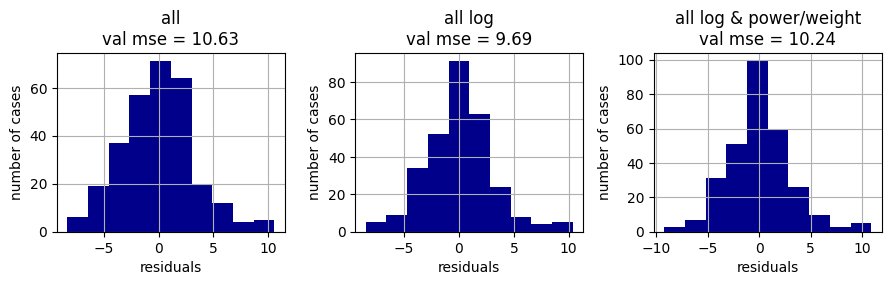

In [78]:
models = [
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
    "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)) + \
        I(np.log(weight)) + I(np.log(acceleration)) + year + origin",
    "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)):I(np.log(weight)) +\
        I(np.log(acceleration)) + year + origin",
    
]

model_name = ["all", "all log", "all log & power/weight",]

fig = plt.figure(figsize=(12, 12))
i = 1
for model in models:
    fig.add_subplot(5, 4, i)
    result, mse = linearRegression(df, model, seed)
    ax = result.resid.hist(color="darkblue")
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(f"{model_name[i-1]}\nval mse = {mse['valid']:.2f}")
    plt.tight_layout()
    i = i + 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     204.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.17e-113
Time:                        17:10:16   Log-Likelihood:                -743.89
No. Observations:                 295   AIC:                             1506.
Df Residuals:                     286   BIC:                             1539.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 115.4755     11.424     10.108      0.000      92.990     137.961
origin[T.2]                 1.9134      0.655      2.922      0.004       0.624       3.202
origin[T.3]                 1.5289      0.620      2.467      0.014       0.309       2.749
I(np.log(cylinders))        1.1944      1.928      0.620      0.536      -2.600       4.989
I(np.log(displacement))     0.0104      1.861      0.006      0.996      -3.654       3.674
I(np.log(horsepower))      -8.9006      1.886     -4.720      0.000     -12.612      -5.189
I(np.log(weight))         -11.9903      2.830     -4.238      0.000     -17.560      -6.421
I(np.log(acceleration))    -6.3983      1.859     -3.442      0.001     -10.057      -2.739
year                        0.7767      0.055     14.148      0.000       0.669       0.885
==============================================================================
Omnibus:                       13.332   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.893
Skew:                           0.335   Prob(JB):                     7.90e-05
Kurtosis:                       4.043   Cond. No.                     5.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

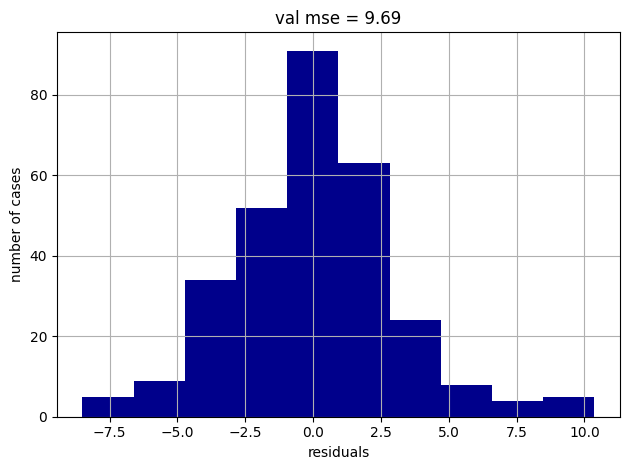

In [79]:
model = "mpg ~ I(np.log(cylinders)) + I(np.log(displacement)) + I(np.log(horsepower)) + I(np.log(weight)) + \
    I(np.log(acceleration)) + year + origin"
result, mse = linearRegression(df, model, seed)
result.resid.hist(color="darkblue")
plt.xlabel("residuals")
plt.ylabel("number of cases")
plt.title(f"val mse = {mse['valid']:.2f}")
plt.tight_layout()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.24e-118
Time:                        17:08:29   Log-Likelihood:                -785.35
No. Observations:                 308   AIC:                             1585.
Df Residuals:                     301   BIC:                             1611.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 117.2246      9.471     12.377      0.000      98.586     135.863
origin[T.2]                 1.2618      0.555      2.272      0.024       0.169       2.355
origin[T.3]                 1.4826      0.564      2.630      0.009       0.373       2.592
I(np.log(horsepower))      -7.2592      1.882     -3.857      0.000     -10.963      -3.555
I(np.log(weight))         -13.0146      1.854     -7.018      0.000     -16.664      -9.365
I(np.log(acceleration))    -5.7077      1.807     -3.158      0.002      -9.264      -2.151
year                        0.7650      0.054     14.210      0.000       0.659       0.871
==============================================================================
Omnibus:                       33.145   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.142
Skew:                           0.599   Prob(JB):                     1.94e-14
Kurtosis:                       4.867   Cond. No.                     4.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

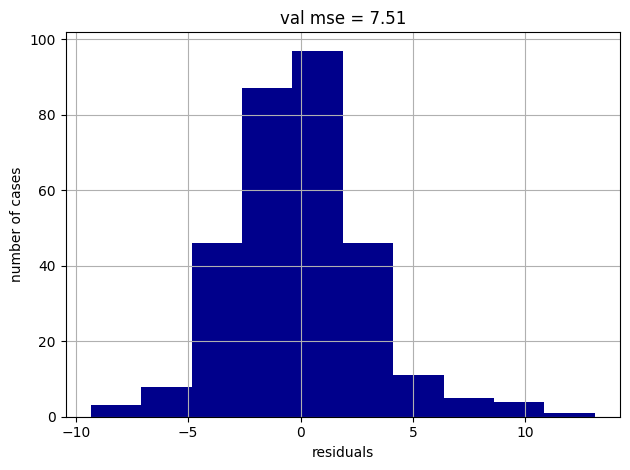

In [72]:
model = "mpg ~ I(np.log(horsepower)) + I(np.log(weight)) + I(np.log(acceleration)) + year + origin"
result, mse = linearRegression(df, model, seed)
result.resid.hist(color="darkblue")
plt.xlabel("residuals")
plt.ylabel("number of cases")
plt.title(f"val mse = {mse['valid']:.2f}")
plt.tight_layout()
result.summary()

334   -0.650363
111   -0.532370
71    -0.486605
243   -0.377706
155   -0.335731
Name: Leverage, dtype: float64
325    0.369642
327    0.452483
393    0.494599
326    0.527090
386    0.538916
Name: Leverage, dtype: float64


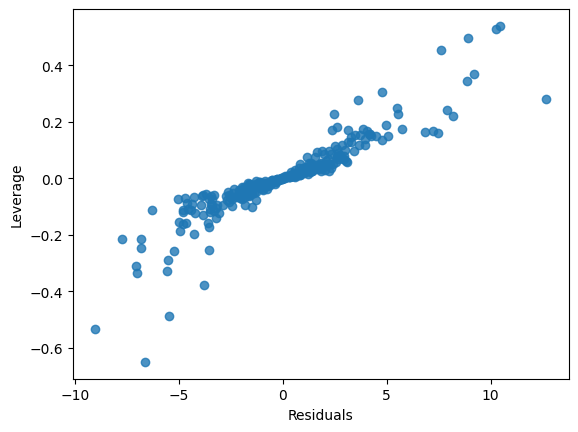

In [80]:
result,_ = linearRegression(df, model)
residuals = pd.Series(result.resid, name="Residuals")
leverage = pd.Series(OLSInfluence(result).influence, name="Leverage")
_ = sns.regplot(x=residuals, y=leverage, fit_reg=False)

print(leverage.sort_values().head())
print(leverage.sort_values().tail())

In [81]:
obs_to_drop = leverage.sort_values().head().index.tolist() + leverage.sort_values().tail().index.tolist()
obs_to_drop

[334, 111, 71, 243, 155, 325, 327, 393, 326, 386]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     325.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          4.72e-123
Time:                        17:10:51   Log-Likelihood:                -689.81
No. Observations:                 287   AIC:                             1394.
Df Residuals:                     280   BIC:                             1419.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 130.6847      8.817     14.822      0.000     113.329     148.041
origin[T.2]                 0.9749      0.517      1.887      0.060      -0.042       1.992
origin[T.3]                 1.9986      0.505      3.955      0.000       1.004       2.993
I(np.log(horsepower))      -6.0842      1.690     -3.600      0.000      -9.411      -2.757
I(np.log(weight))         -14.3338      1.718     -8.343      0.000     -17.716     -10.952
I(np.log(acceleration))    -6.4942      1.546     -4.201      0.000      -9.537      -3.451
year                        0.6829      0.048     14.371      0.000       0.589       0.776
==============================================================================
Omnibus:                       40.345   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.796
Skew:                           0.665   Prob(JB):                     3.52e-22
Kurtosis:                       5.548   Cond. No.                     4.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

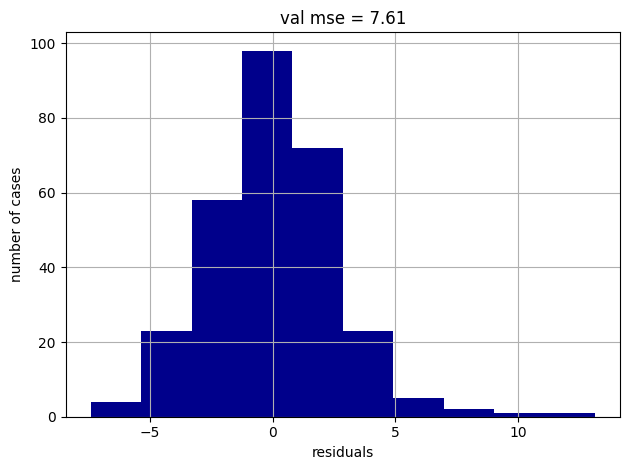

In [82]:
df2 = df.drop(obs_to_drop)

model = "mpg ~ I(np.log(horsepower)) + I(np.log(weight)) + I(np.log(acceleration)) + year + origin"
result, mse = linearRegression(df2, model, seed)
result.resid.hist(color="darkblue")
plt.xlabel("residuals")
plt.ylabel("number of cases")
plt.title(f"val mse = {mse['valid']:.2f}")
plt.tight_layout()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     461.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.16e-122
Time:                        17:11:47   Log-Likelihood:                -697.67
No. Observations:                 287   AIC:                             1405.
Df Residuals:                     282   BIC:                             1424.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 145.1570      8.110     17.898      0.000     129.193     161.121
I(np.log(horsepower))      -4.8642      1.695     -2.869      0.004      -8.201      -1.527
I(np.log(weight))         -17.1490      1.603    -10.700      0.000     -20.304     -13.994
I(np.log(acceleration))    -5.8033      1.573     -3.689      0.000      -8.900      -2.707
year                        0.6962      0.048     14.606      0.000       0.602       0.790
==============================================================================
Omnibus:                       48.229   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.591
Skew:                           0.790   Prob(JB):                     1.07e-26
Kurtosis:                       5.740   Cond. No.                     3.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

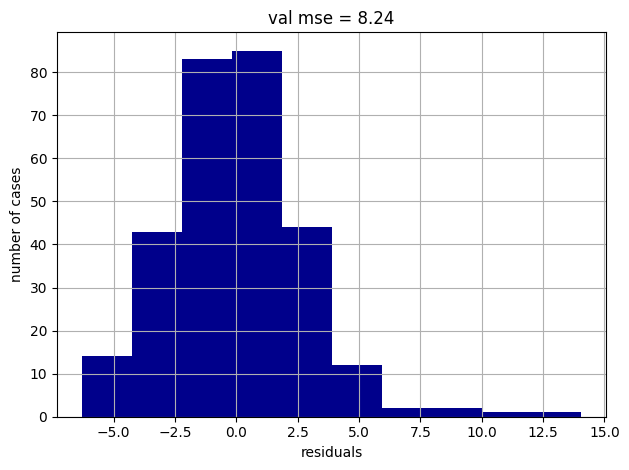

In [83]:
model = "mpg ~ I(np.log(horsepower)) + I(np.log(weight)) + I(np.log(acceleration)) + year"
result, mse = linearRegression(df2, model, seed)
result.resid.hist(color="darkblue")
plt.xlabel("residuals")
plt.ylabel("number of cases")
plt.title(f"val mse = {mse['valid']:.2f}")
plt.tight_layout()
result.summary()